In [1]:
#libraries
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




#I define here some functions for better visualization of the posterior plots
def resizeplot():
    plt.figure(figsize=(10,5))
def resizecorr():
    plt.figure(figsize=(15,7))

In [2]:
uploaded = files.upload()

Saving weather.csv to weather.csv


In [3]:
weather_data = pd.read_csv('weather.csv')
weather_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [4]:
weather_data.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

<Axes: >

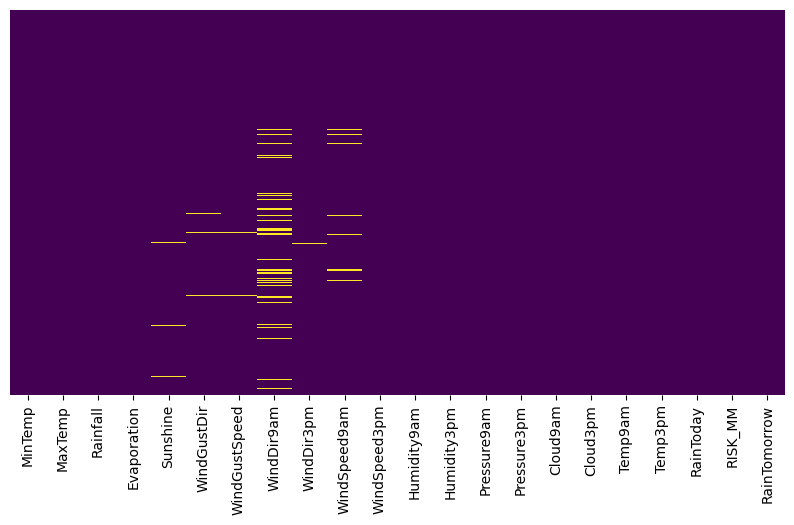

In [9]:
resizeplot()
sns.heatmap(weather_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

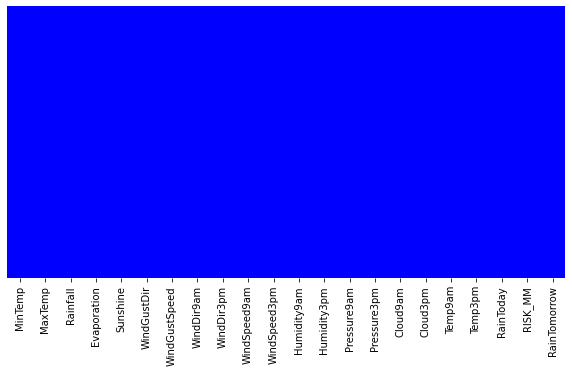

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
imputer_int = KNNImputer(missing_values=np.nan)
weather_data['Sunshine'] = imputer_int.fit_transform(weather_data[['Sunshine']])
imputer_str = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
weather_data['WindGustDir'] = imputer_str.fit_transform(weather_data[['WindGustDir']])
weather_data['WindGustSpeed'] = imputer_int.fit_transform(weather_data[['WindGustSpeed']])
weather_data['WindDir9am'] = imputer_str.fit_transform(weather_data[['WindDir9am']])
weather_data['WindDir3pm'] = imputer_str.fit_transform(weather_data[['WindDir3pm']])
weather_data['WindSpeed9am'] = imputer_int.fit_transform(weather_data[['WindSpeed9am']])
resizeplot()
sns.heatmap(weather_data.isnull(),yticklabels=False,cbar=False,cmap='bwr')

In [ ]:
weather_data.drop('RISK_MM', inplace=True,axis=1)
weather_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,68,29,1019.7,1015.0,7,7,14.4,23.6,No,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,No


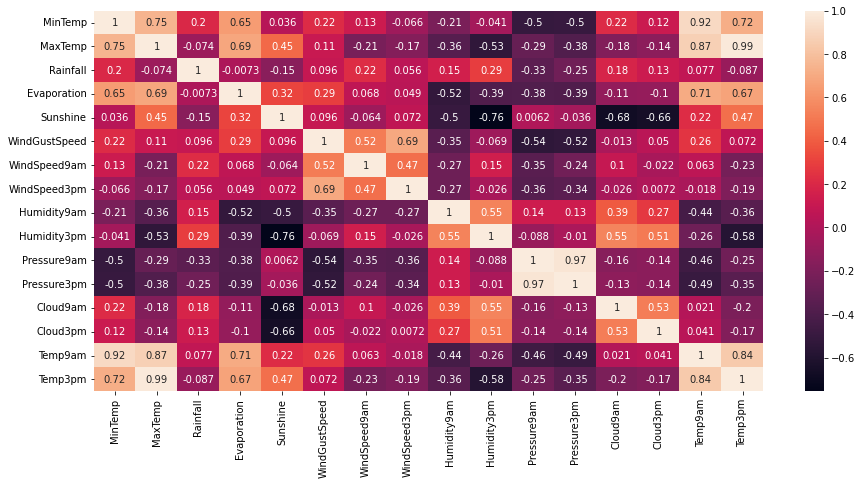

In [ ]:
resizecorr()
sns.heatmap(weather_data.corr(),annot=True)

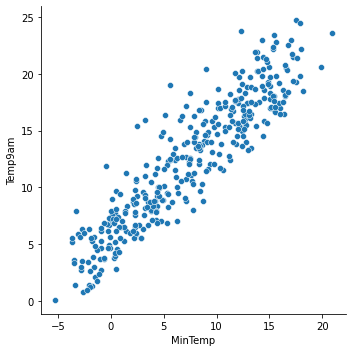

In [ ]:
sns.relplot(x='MinTemp',y='Temp9am',data=weather_data)

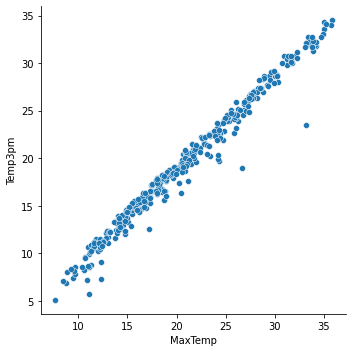

In [ ]:
sns.relplot(x='MaxTemp',y='Temp3pm',data=weather_data)

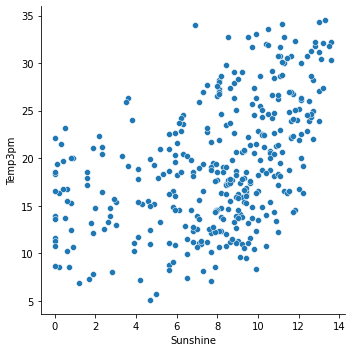

In [ ]:
sns.relplot(x='Sunshine',y='Temp3pm',data=weather_data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


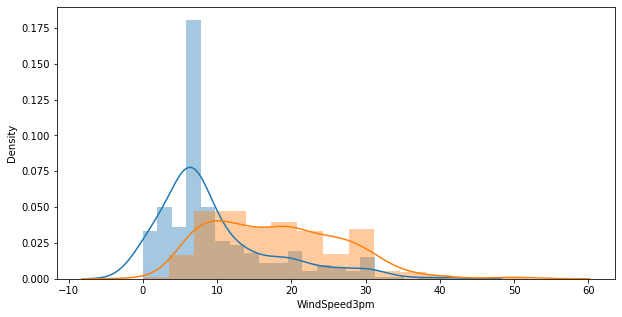

In [ ]:
resizeplot()
sns.distplot(weather_data['WindSpeed9am'])
sns.distplot(weather_data['WindSpeed3pm'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


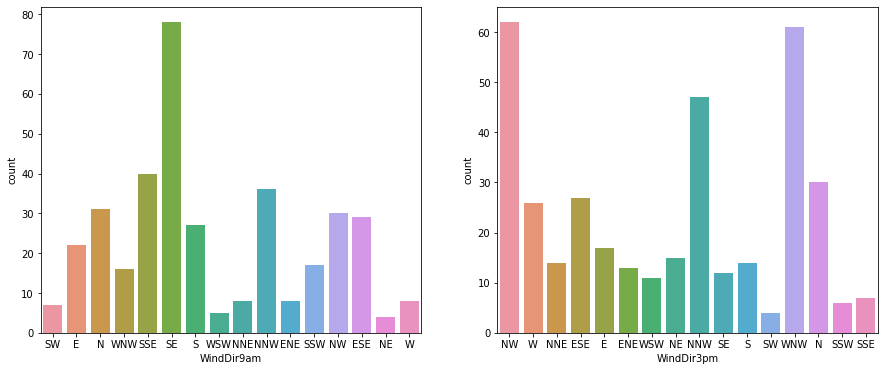

In [ ]:
fig, ax =plt.subplots(1,2,figsize= (15,6))
sns.countplot(weather_data['WindDir9am'],ax=ax[0])
sns.countplot(weather_data['WindDir3pm'],ax=ax[1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


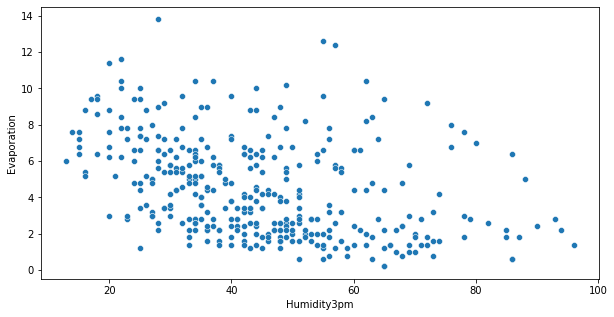

In [ ]:
resizeplot()
sns.scatterplot(weather_data['Humidity3pm'],weather_data['Evaporation'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


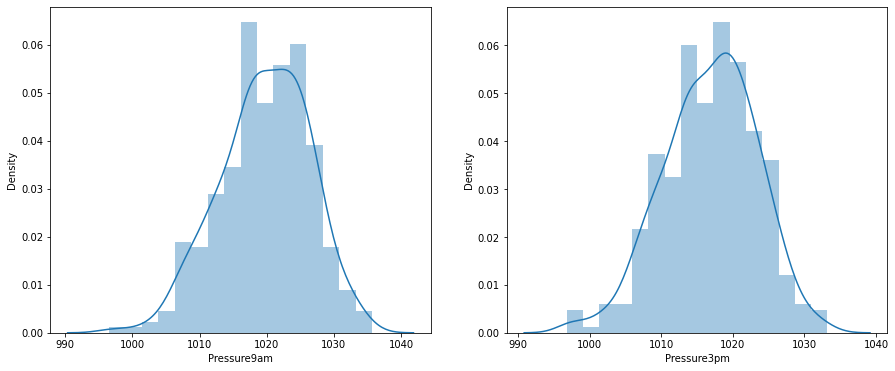

In [ ]:
fig, ax =plt.subplots(1,2,figsize= (15,6))
sns.distplot(weather_data['Pressure9am'],ax=ax[0])
sns.distplot(weather_data['Pressure3pm'],ax=ax[1])

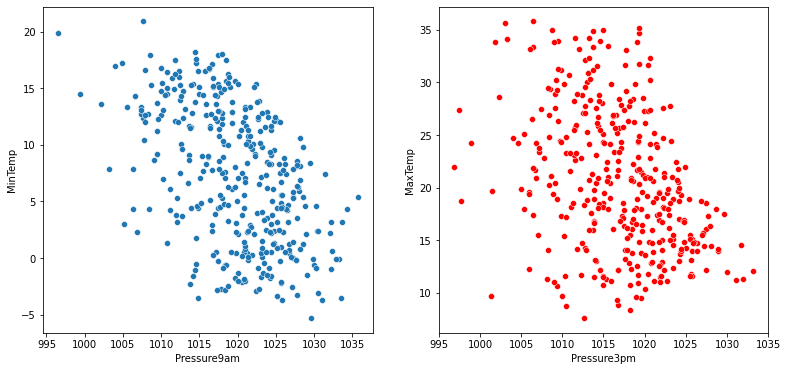

In [ ]:
fig, ax =plt.subplots(1,2,figsize= (13,6))
sns.scatterplot(data=weather_data,x='Pressure9am',y='MinTemp',ax=ax[0])
sns.scatterplot(data=weather_data,x='Pressure3pm',y='MaxTemp',ax=ax[1],color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


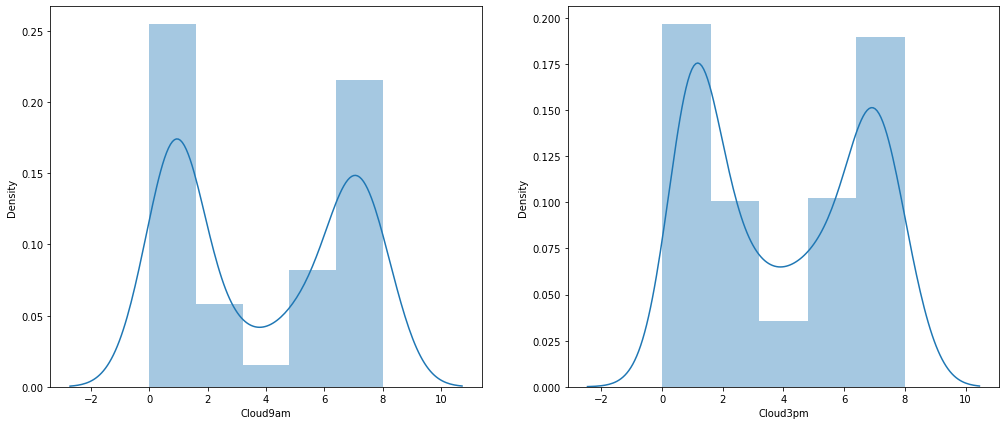

In [ ]:
fig, ax =plt.subplots(1,2,figsize= (17,7))
sns.distplot(weather_data['Cloud9am'],ax=ax[0])
sns.distplot(weather_data['Cloud3pm'],ax=ax[1])

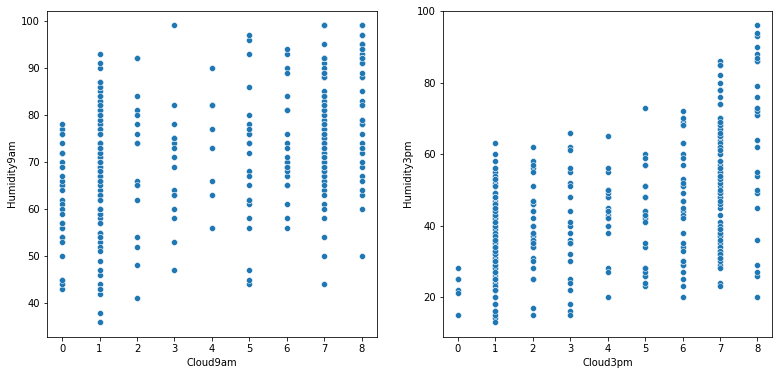

In [ ]:
fig, ax =plt.subplots(1,2,figsize= (13,6))
sns.scatterplot(data=weather_data, x='Cloud9am',y='Humidity9am',ax=ax[0])
sns.scatterplot(data=weather_data,x='Cloud3pm',y='Humidity3pm',ax=ax[1])

In [ ]:
weather_data[['Rainfall','Sunshine','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am',
    'Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am',
    'Temp3pm']].groupby(weather_data['RainToday']).mean()

,Rainfall,Sunshine,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
RainToday,,,,,,,,,,,,,,
No,0.056667,8.179729,4.562667,38.682271,8.683036,17.640000,70.783333,41.996667,1020.812000,1017.658667,3.593333,3.906667,12.126333,19.456000
Yes,7.663636,6.680445,4.336364,45.106061,14.055330,19.560606,77.727273,55.984848,1014.695455,1012.954545,5.242424,4.560606,13.413636,18.207576


In [ ]:
# Use LabelBinarizer to handle categorical data
from sklearn.preprocessing import LabelBinarizer
LB = LabelBinarizer()
weather_data['WindGustDir'] = LB.fit_transform(weather_data[['WindGustDir']])
weather_data['WindDir9am'] = LB.fit_transform(weather_data[['WindDir9am']])
weather_data['WindDir3pm'] = LB.fit_transform(weather_data[['WindDir3pm']])

#Here, change the Labels of our main forecasts.

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
weather_data['RainToday'] = LE.fit_transform(weather_data['RainToday'])
weather_data['RainTomorrow'] = LE.fit_transform(weather_data['RainTomorrow'])
# How the data is doing.
weather_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,0,30.0,0,0,6.0,...,68,29,1019.7,1015.0,7,7,14.4,23.6,0,1
1,14.0,26.9,3.6,4.4,9.7,0,39.0,1,0,4.0,...,80,36,1012.4,1008.4,5,3,17.5,25.7,1,1
2,13.7,23.4,3.6,5.8,3.3,0,85.0,0,0,6.0,...,82,69,1009.5,1007.2,8,7,15.4,20.2,1,1
3,13.3,15.5,39.8,7.2,9.1,0,54.0,0,0,30.0,...,62,56,1005.5,1007.0,2,7,13.5,14.1,1,1
4,7.6,16.1,2.8,5.6,10.6,0,50.0,0,0,20.0,...,68,49,1018.3,1018.5,7,7,11.1,15.4,1,0


In [ ]:
from sklearn.model_selection import train_test_split
X = weather_data.drop('RainTomorrow',axis=1).values
y = weather_data['RainTomorrow'].values
# standardize  information, as they are on very different scales.
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X = minmax.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55, random_state=104)


In [ ]:
#predictor algo...
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)


DecisionTreeClassifier()

In [ ]:
previsor_dtree = dtree.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(classification_report(y_test,previsor_dtree))
#print(confusion_matrix(y_test,previsor_dtree))
print('\n')
print('Acurácia:',np.round(accuracy_score(y_test,previsor_dtree),3)*100,'%')

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       170
           1       0.45      0.56      0.50        32

    accuracy                           0.82       202
   macro avg       0.68      0.72      0.70       202
weighted avg       0.84      0.82      0.83       202



Acurácia: 82.19999999999999 %


In [ ]:
#Random Forest classifier algo...
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=270)
rfc.fit(X_train,y_train)


RandomForestClassifier(n_estimators=270)

In [ ]:
previsor_rfc = rfc.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(classification_report(y_test,previsor_rfc))
print(confusion_matrix(y_test,previsor_rfc))
print('\n')
print('Acurácia:',np.round(accuracy_score(y_test,previsor_rfc),3)*100,'%')

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       170
           1       0.71      0.47      0.57        32

    accuracy                           0.89       202
   macro avg       0.81      0.72      0.75       202
weighted avg       0.88      0.89      0.88       202

[[164   6]
 [ 17  15]]


Acurácia: 88.6 %


In [ ]:
#support vector classifier/machine algo...
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)


SVC()

In [ ]:
previsor_svc = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,previsor_svc))
print(confusion_matrix(y_test,previsor_svc))
print('\n')
print('Acurácia:',np.round(accuracy_score(y_test,previsor_svc),3)*100,'%')

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       139
           1       0.54      0.30      0.39        23

    accuracy                           0.86       162
   macro avg       0.72      0.63      0.66       162
weighted avg       0.84      0.86      0.85       162

[[133   6]
 [ 16   7]]


Acurácia: 86.4 %


In [ ]:
#logistic regression algoo...
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)



LogisticRegression()

In [ ]:
predict_LR = LR.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(classification_report(y_test,predict_LR))
print(confusion_matrix(y_test,predict_LR))
print('\n')
print('Acurácia:', np.round(accuracy_score(y_test,predict_LR),3)*100,'%')

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       139
           1       0.50      0.35      0.41        23

    accuracy                           0.86       162
   macro avg       0.70      0.65      0.66       162
weighted avg       0.84      0.86      0.85       162

[[131   8]
 [ 15   8]]


Acurácia: 85.8 %


In [ ]:
Acuracia_LR = np.round(accuracy_score(y_test,predict_LR),3) *100
Acuracia_svc = np.round(accuracy_score(y_test,previsor_svc),3)*100
Acuracia_rfc = np.round(accuracy_score(y_test,previsor_rfc),3)*100
Acuracia_dtree = np.round(accuracy_score(y_test,previsor_dtree),3)*100

In [ ]:
print('Acurácia_Decision_tree: ',Acuracia_dtree,'%')
print('Acurácia_Random_Forest: ', Acuracia_rfc,'%')
print('Acurácia_LR: ', Acuracia_LR,'%')
print('Acurácia_SVC: ', Acuracia_svc,'%')

Acurácia_Decision_tree:  77.8 %
Acurácia_Random_Forest:  87.0 %
Acurácia_LR:  85.8 %
Acurácia_SVC:  86.4 %
